In [4]:
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt
import statsmodels.api as sm
import statsmodels.formula.api as smf
import seaborn as sns
import scipy as sp
import faraway.utils

In [1]:
import faraway.datasets.crawl
crawl = faraway.datasets.crawl.load()
crawl.head()

,crawling,SD,n,temperature
January,29.84,7.08,32,66
February,30.52,6.96,36,73
March,29.70,8.33,23,72
April,31.84,6.21,26,63
May,28.58,8.07,27,52


In [2]:
print(faraway.datasets.crawl.DESCR)


Crawling babies by month

Description:

     A study investigated whether babies take longer to learn to crawl
     in cold months when they are often bundled in clothes that
     restrict their movement, than in warmer months. The study sought
     an association between babies' first crawling age and the average
     temperature during the month they first try to crawl (about 6
     months after birth). Parents brought their babies into the
     University of Denver Infant Study Center between 1988-1991 for the
     study. The parents reported the birth month and age at which their
     child was first able to creep or crawl a distance of four feet in
     one minute.  Data were collected on 208 boys and 206 girls (40
     pairs of which were twins)

Variables:

     A data frame with 12 observations on the following 4 variables.

     ‘crawling’ average crawling age in weeks

     ‘SD’ standard deviation of crawling age

     ‘n’ sample size

     ‘temperature’ average temperature(

In this special case we are given $\sigma$ -- standard deviation of the response.</br>
Therefore, we would include weights in our model.

In [5]:
lmod = smf.ols("crawling ~ temperature", crawl).fit()
lmod.sumary()

             coefs stderr tvalues pvalues
Intercept   35.678  1.318   27.08  0.0000
temperature -0.078  0.025   -3.10  0.0113

n=12 p=2 Residual SD=1.319 R-squared=0.49


In [6]:
%run utils.ipynb

(<Figure size 1440x504 with 2 Axes>,
 array([<AxesSubplot:xlabel='y.hat', ylabel='e.hat'>,
        <AxesSubplot:xlabel='y.hat', ylabel='sqrt(|e.hat|)'>], dtype=object))

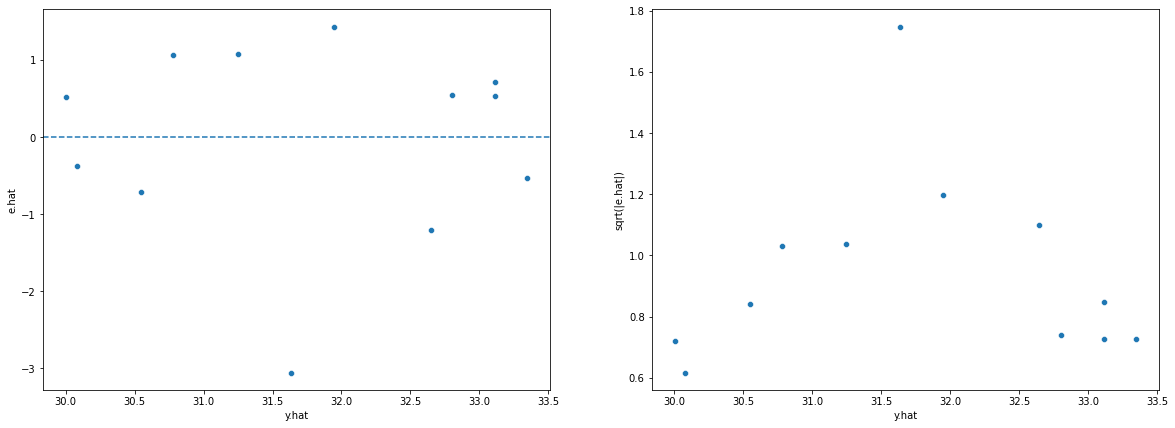

In [7]:
resid_yhat_plot(lmod)

In [23]:
wlmod = smf.wls("crawling ~ temperature", crawl, weights=1/crawl["SD"]**2).fit()

wlmod.summary().tables[1]

/usr/local/lib/python3.10/dist-packages/scipy/stats/_stats_py.py:1769: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=12
  warnings.warn("kurtosistest only valid for n>=20 ... continuing "


,coef,std err,t,P>|t|,[0.025,0.975]
Intercept,35.7308,1.272,28.100,0.000,32.898,38.564
temperature,-0.0755,0.024,-3.144,0.010,-0.129,-0.022


(<Figure size 1440x504 with 2 Axes>,
 array([<AxesSubplot:xlabel='y.hat', ylabel='e.hat'>,
        <AxesSubplot:xlabel='y.hat', ylabel='sqrt(|e.hat|)'>], dtype=object))

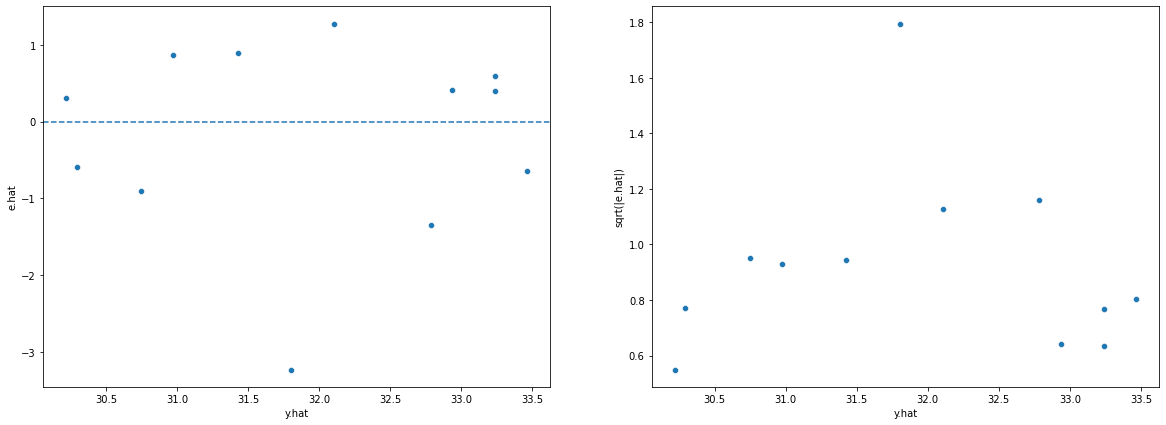

In [24]:
resid_yhat_plot(wlmod)

The weights in this case don't make much difference.

## Gammaray

In [26]:
import faraway.datasets.gammaray

gammaray = faraway.datasets.gammaray.load()
gammaray.head()

,time,flux,error
0,133,122.7,5.7
1,143,109.5,5.4
2,153,101.4,5.2
3,163,92.0,4.9
4,173,86.8,4.8


In [28]:
print(faraway.datasets.gammaray.DESCR)


Xray decay from a gamma ray burst

Description:

     The X-ray decay light curve of Gamma ray burst 050525a obtained
     with the X-Ray Telescope (XRT) on board the Swift satellite. The
     dataset has 63 brightness measurements in the 0.4-4.5 keV spectral
     band at times ranging from 2 minutes to 5 days after the burst.

Variables:

     A data frame with 63 observations on the following 3 variables.

     ‘time’ in seconds since burst

     ‘flux’ X-ray flux in units of 10^-11 erg/cm2/s, 2-10 keV

     ‘error’ measurement error of the flux based on detector
          signal-to-noise values

Source:

     A. J. Blustin and 64 coauthors, Astrophys. J. 637, 901-913 2006.
     Available at http://arxiv.org/abs/astro-ph/0507515.



Text(0, 0.5, 'log(flux)')

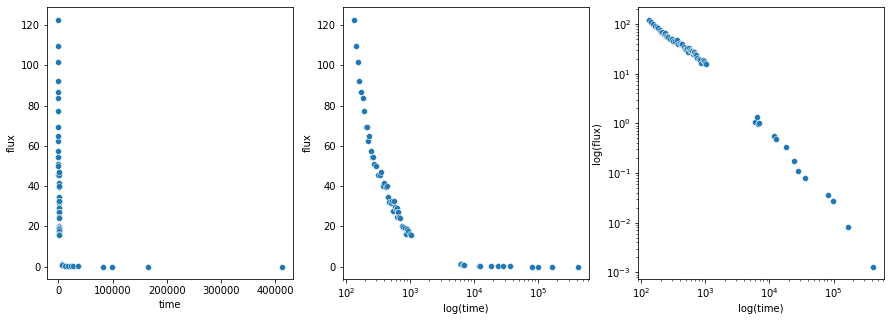

In [38]:
f, ax = plt.subplots(1, 3, figsize=(15, 5))

for i in range(3):
    sns.scatterplot(x="time", y="flux", data=gammaray, ax=ax[i])
ax[1].set_xscale('log')
ax[1].set_xlabel("log(time)")
ax[2].set_xscale('log')
ax[2].set_yscale('log')
ax[2].set_xlabel("log(time)")
ax[2].set_ylabel("log(flux)")

In [61]:
import faraway.utils
gammaray["ltime"] = np.log(gammaray["time"])
gammaray["lflux"] = np.log(gammaray["flux"])

lmod = smf.ols("lflux ~ ltime", gammaray).fit()
lmod.sumary()

           coefs stderr tvalues pvalues
Intercept 11.703  0.134   87.14  0.0000
ltime     -1.338  0.019  -71.79  0.0000

n=63 p=2 Residual SD=0.280 R-squared=0.99


In [114]:
for col in ["flux", "time"]:
    gammaray["w" + col] = 1/gammaray["error"] * gammaray[col]
    
gammaray["lwtime"] = np.log(gammaray["wtime"])
gammaray["lwflux"] = np.log(gammaray["wflux"])

gammaray.head()

,time,flux,error,ltime,lflux,wflux,wtime,lwtime,lwflux
0,133,122.7,5.7,4.890349,4.809742,21.526316,23.333333,3.149883,3.069276
1,143,109.5,5.4,4.962845,4.695925,20.277778,26.481481,3.276446,3.009526
2,153,101.4,5.2,5.030438,4.619073,19.500000,29.423077,3.381779,2.970414
3,163,92.0,4.9,5.093750,4.521789,18.775510,33.265306,3.504515,2.932553
4,173,86.8,4.8,5.153292,4.463607,18.083333,36.041667,3.584676,2.894991


In [111]:
wlmod = smf.ols("np.log(wflux) ~ np.log(wtime)", gammaray).fit()
wlmod.sumary()

               coefs stderr tvalues pvalues
Intercept      3.398  0.043   79.06  0.0000
np.log(wtime) -0.121  0.005  -22.90  0.0000

n=63 p=2 Residual SD=0.166 R-squared=0.90


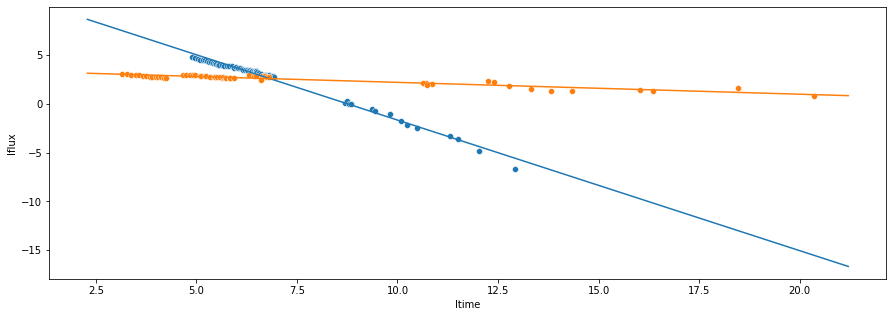

In [115]:
f, ax = plt.subplots(1, 1, figsize=(15, 5))

sns.scatterplot(x="ltime", y="lflux", data=gammaray, ax=ax)
sns.scatterplot(x="lwtime", y="lwflux", data=gammaray, ax=ax)

# unw_exog = pd.DataFrame(wlmod.model.exog, columns=wlmod.params.index)
# unw_endog= wlmod.model.endog
# wexog = pd.DataFrame(wlmod.model.wexog, columns=wlmod.params.index)
# wendog = wlmod.model.wendog
# sns.scatterplot(x=wexog["ltime"], y=wendog)


for i in range(gammaray.shape[0]):
    unw_xi = unw_exog.loc[i, "ltime"]
    unw_yi = unw_endog[i]
    errori = gammaray.loc[i, "error"]
    
    w_xi = wexog.loc[i, "ltime"]
    w_yi = wendog[i]
    
    plt.plot

    
#     plt.plot([unw_xi, unw_xi], np.log([unw_yi-errori, unw_yi+errori]), color="r")
    

xr = np.array(ax.get_xlim())
for model in [lmod, wlmod]:
    ax.plot(
        xr,
        model.params[0] + model.params[1] * xr,
    )